In [1]:
import javabridge
import bioformats
import numpy as np

In [2]:
javabridge.start_vm(class_path=bioformats.JARS)
# path_to_data = 'Fixed_EB128_4_laser_powers_0.2steps_59_MMStack_Pos0.ome.tif'
path_to_data = 'Fixed_EB128_4_laser_powers_0.2steps_1_MMStack_Pos0.ome.tif'

# get XML metadata of complete file
xml_string = bioformats.get_omexml_metadata(path_to_data)
ome = bioformats.OMEXML(xml_string) # be sure everything is ascii
print(ome.image_count)

1


In [3]:
iome = ome.image(0) # e.g. first image
print(iome.get_Name())
print(iome.get_ID())

# get pixel meta data
print(iome.Pixels.get_DimensionOrder())
print(iome.Pixels.get_PixelType())
print(iome.Pixels.get_SizeX())
print(iome.Pixels.get_SizeY())
print(iome.Pixels.get_SizeZ())
print(iome.Pixels.get_SizeT())
print(iome.Pixels.get_SizeC())
print(iome.Pixels.DimensionOrder)

Fixed_EB128_4_laser_powers_0.2steps_1_MMStack_Pos0.ome.tif
Image:0
XYCZT
uint16
512
512
1
405
1
XYCZT


In [4]:
reader = bioformats.ImageReader(path_to_data)
raw_data = []
for z in range(iome.Pixels.get_SizeZ()):
    # returns 512 x 512 x SizeC array (SizeC = number of channels)
    raw_image = reader.read(z=z, series=0, rescale=False) 
    raw_data.append(raw_image)
raw_data = np.array(raw_data) # 512 x 512 x SizeC x SizeZ array
print(raw_data.shape)

(1, 512, 512)


In [5]:
reader = bioformats.ImageReader(path_to_data)
raw_data_t = []
for t in range(iome.Pixels.get_SizeT()):
    # returns 512 x 512 x SizeC array (SizeC = number of channels)
    raw_image = reader.read(t=t, series=0, rescale=False) 
    raw_data_t.append(raw_image)
raw_data_t = np.array(raw_data_t) # 512 x 512 x SizeC x SizeZ array
print(raw_data_t.shape)

(405, 512, 512)


In [6]:
import matplotlib.pylab as plt

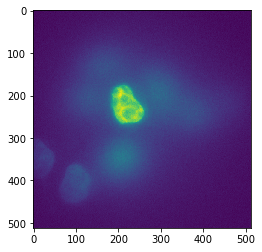

In [7]:
plt.imshow(raw_data_t[0,:,:])
plt.show()

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import imageio

def plot_for_offset(i):
    global raw_data_t
    fig, ax = plt.subplots(figsize=(5,5))
    ax.imshow(raw_data_t[i, :, :])
    ax.grid()

    # Used to return the plot as an image rray
    fig.canvas.draw()       # draw the canvas, cache the renderer
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    return image

kwargs_write = {'fps':1.0, 'quantizer':'nq'}
imageio.mimsave('./cell_tmp.gif', [plot_for_offset(i) for i in range(raw_data_t.shape[0])], fps=20)